## Import Package

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

## Load Dataset

In [7]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Data Preprocessing (20 point)

1. lakukan data preprocessing termasuk kecuali melakukan reduksi dimensi

In [11]:
X = boston.drop('MEDV',axis = 1)
y = boston['MEDV']

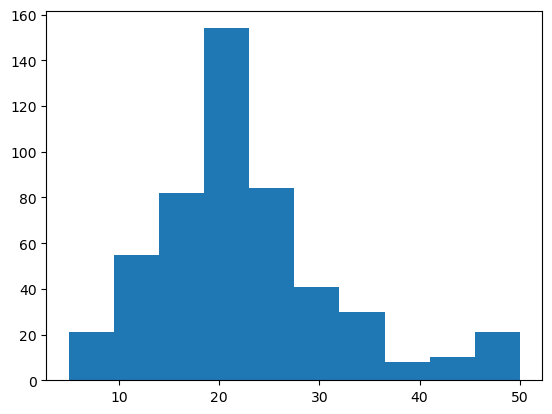

In [39]:
plt.hist(y)
plt.show()

distribusi target MEDV tersebar paling banyak di 20

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)

In [14]:
X_std

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

### PCA Prosess (40)

1. lakukan data preprocessing termasuk melakukan reduksi dimensi dengan PCA (analisis berapa penggunaan PC yang tepat)

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 12 ).fit(X_std)
pcs = pca.transform(X_std)

pdf = pd.DataFrame(data = pcs, columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12'])
pdf['MEDV'] = y
pdf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,MEDV
0,-2.098297,0.773113,0.342943,-0.891774,0.423070,-0.315338,0.318641,0.295832,-0.424937,0.640206,-0.033000,0.019440,24.0
1,-1.457252,0.591985,-0.695199,-0.487459,-0.195876,0.264223,0.553861,-0.223670,-0.166962,0.084236,-0.640810,-0.125797,21.6
2,-2.074598,0.599639,0.167122,-0.739204,-0.934534,0.448095,0.484560,0.105166,0.069775,-0.180380,-0.487557,0.133327,34.7
3,-2.611504,-0.006871,-0.100284,-0.343721,-1.104956,0.664649,0.622641,0.255941,-0.342246,0.045901,-0.360209,0.508678,33.4
4,-2.458185,0.097712,-0.075348,-0.427907,-1.065924,0.617047,0.705086,-0.134524,-0.417668,-0.140880,-0.395150,0.497732,36.2


In [22]:
print('explained variance :', pca.explained_variance_)
print('explained variance ratio:', pca.explained_variance_ratio_)

explained variance : [6.1389812  1.43611329 1.2450773  0.85927328 0.83646904 0.65870897
 0.5364162  0.39688167 0.27749173 0.22067394 0.18638271 0.16963823]
explained variance ratio: [0.47129606 0.11025193 0.0955859  0.06596732 0.06421661 0.05056978
 0.04118124 0.03046902 0.02130333 0.01694137 0.0143088  0.01302331]


setelah dihitung jumlah ratio variance dari pc1 sampai pc6 jumlah rationya 0,854 atau 85,4% data yang merepresentasikan data aslinya, selanjutnya kita akan mereduksi menjadi 6 feature saja

### Reduksi Feature

In [23]:
pca = PCA(n_components = 6 ).fit(X_std)
pcs = pca.transform(X_std)

new_data= pd.DataFrame(data = pcs, columns = ['pc1','pc2','pc3','pc4','pc5','pc6'])
new_data['MEDV'] = y
new_data.head()

,pc1,pc2,pc3,pc4,pc5,pc6,MEDV
0,-2.098297,0.773113,0.342943,-0.891774,0.423070,-0.315338,24.0
1,-1.457252,0.591985,-0.695199,-0.487459,-0.195876,0.264223,21.6
2,-2.074598,0.599639,0.167122,-0.739204,-0.934534,0.448095,34.7
3,-2.611504,-0.006871,-0.100284,-0.343721,-1.104956,0.664649,33.4
4,-2.458185,0.097712,-0.075348,-0.427907,-1.065924,0.617047,36.2


## Regression Model (20 point)

regresi model kali ini saya menggunakan ridge regression 

In [24]:
# Split data 
from sklearn.model_selection import train_test_split

X_pca = new_data.drop('MEDV', axis = 1)
y_pca = new_data['MEDV']

X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca,y_pca,
                                                                   test_size = 0.3,
                                                                   random_state = 42)



In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_std,y,
                                                    test_size = 0.3,random_state = 42)

In [46]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
# train and test model with PCA reduction

# train model
Rd_pca = Ridge(alpha = 1).fit(X_pca_train,y_pca_train)

y_pred_train_pca = Rd_pca.predict(X_pca_train)
residuals = y_pca_train - y_pred_train_pca
MSE = np.mean(residuals**2)
RMSE_train_pca = np.sqrt(MSE)

# test model
y_pred_pca = Rd_pca.predict(X_pca_test)

residuals = y_pca_test - y_pred_pca
MSE = np.mean(residuals**2)
RMSE_test_pca = np.sqrt(MSE)


In [44]:
# train and test model without PCA reduction

# train model
Rd = Ridge(alpha = 1).fit(X_train,y_train)

y_pred_train = Rd.predict(X_train)
residuals = y_train - y_pred_train
MSE = np.mean(residuals**2)
RMSE_train = np.sqrt(MSE)

# test model
y_pred = Rd.predict(X_test)

residuals = y_test - y_pred
MSE = np.mean(residuals**2)
RMSE_test = np.sqrt(MSE)

## Evaluasi (20)

Bandingkan hasil menggunakan PCA dan tidak menggunakan PCA

In [58]:
print('performa model dengan PCA :','alpha: 1',', RMSE train pca:', RMSE_train_pca,', RMSE test pca:', RMSE_test_pca)
print('performa model tanpa PCA :','alpha: 1',', RMSE train:', RMSE_train,', RMSE test pca:', RMSE_test)

performa model dengan PCA : alpha: 1 , RMSE train pca: 5.054930778528453 , RMSE test pca: 5.0084452630695075
performa model tanpa PCA : alpha: 1 , RMSE train: 4.748371256496625 , RMSE test pca: 4.642036234558952


kesimpulan:
1. performa model tanpa reduksi dimensi PCA lebih baik karena nilai RMSEnya lebih kecil, dengan menggunakan model Ridge Regression dan alpha = 1
2. model tidak overfiting atau underfiting

In [57]:
model_summary=pd.DataFrame({'feature_name':(['intercept'] + list(X)), 'Coeficient Ridge Regression':([Rd.intercept_]+list(Rd.coef_))})
model_summary

,feature_name,Coeficient Ridge Regression
0,intercept,22.509890
1,CRIM,-1.133655
2,ZN,0.812628
3,INDUS,0.310566
4,CHAS,0.797254
5,NOX,-1.749523
6,RM,2.854456
7,AGE,-0.307262
8,DIS,-2.875986
9,RAD,2.027825
